# **머신러닝 실습 과제 Task 2**

## 실습과제 소개
본 과제는 주고객이 구매하지 않은 상품에 대해 요금이 청구되지 않도록 신용카드 회사가 `신용카드 사기 거래를 식별`하는 것이 목표입니다.

## 파일 구성
 - **creditcard.csv**:

## 특성(feature), 타켓(target)설명
 - feature
     - `Time` : 거래 시간
     - `amount` : 거래 양
     - `v1` ~ `v23` feature들은 익명처리되어 있습니다.
 - target
     - `Class`: 0->정상 거래, 1->사기 거래, 

## 평가 측도
 - **`Accuracy`**: 높을수록 좋음

## 제출 안내
 - 스마트리드 과제란에 주피터 노트북 파일을 제출 (본인학번_이름_ML_homework2.ipynb)로 저장.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

import shutil
columns = shutil.get_terminal_size().columns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from IPython.display import Javascript
from IPython.display import display

### 데이터 불러오기 

In [ ]:
!

In [141]:
pwd 

'D:\\asy10\\문서\\대학원\\조교수업\\2023-2\\머신러닝\\실습과제\\Credit_Card_Fraud_Detection\\data'

In [2]:
data = pd.read_csv('./creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

### 결측치 확인 

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Quiz1. 데이터셋 분할하기
- 이전 과제처럼 train.csv, test.csv 파일이 따로 있는 것이 아닙니다. 이점 유의 하세요.

In [6]:


X = data.drop('Class', axis=1) 
y = data['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [7]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [8]:
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

In [9]:
y_train.value_counts()

Class
0    227465
1       380
Name: count, dtype: int64

In [10]:
z = list(y_train)

count0 = 0
count1 = 0

for i in z:
    if i == 0:
        count0 = count0 + 1
    elif i == 1:
        count1 = count1 + 1

# Class frequencies

class_label_train = ['Authentic', 'Fraud']
class_frequency_train = [count0, count1]

fig1 = px.pie(values = class_frequency_train,
             names = class_label_train,
             title = 'Frequency comparison of authentic and fraudulent transactions in the training dataset',
             template = 'ggplot2'
            )
fig1.show()

### Quiz2. 데이터셋 분할하기
- data_train에 feature와 타켓 label이 모두 있는 데이터 프레임을 생성하세요. (이전 과제의 train.csv를 만든다고 생각하시면 됩니다.)
- data_train에서 사기 데이터, 사기가 아닌 데이터 프레임을 생성하세요.

In [11]:

selected_features = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
data_train = pd.DataFrame(X_train[selected_features].copy())
data_train['Class'] = y_train

data_train_authentic = data_train[data_train['Class'] == 0]
data_train_fraudulent = data_train[data_train['Class'] == 1]

In [12]:
data_train.shape

(227845, 31)

### train set에서 사기가 아닌 거래와 사기 거래의 양과 시간

In [13]:
class_list_train = list(y_train)
fraud_status_train = []
for i in range(len(class_list_train)):
    fraud_status_train.append(bool(class_list_train[i]))

fig1 = px.scatter(data_train,
                 x = 'Time',
                 y = 'Amount', 
                 facet_col = fraud_status_train,
                 color = fraud_status_train,
                 title = 'Amount vs Time for the training set',
                 template = 'ggplot2'
                )
fig1.show()

### Quiz3. 데이터셋 분할하기
- 현재 사용하는 데이터셋의 문제점을 작성하세요
- answer : 데이터가 불균형이라 학습이 제대로 되지 못한다.

### Random over-sampling (ROS)
- train dataset의 균형을 맞추기 위해 다수 클래스의 하위 집합을 사용합니다.

Class frequencies after over-sampling:
Class
0    227465
1    227465
Name: count, dtype: int64


<Axes: title={'center': 'Class frequencies after over-sampling'}, xlabel='Class'>

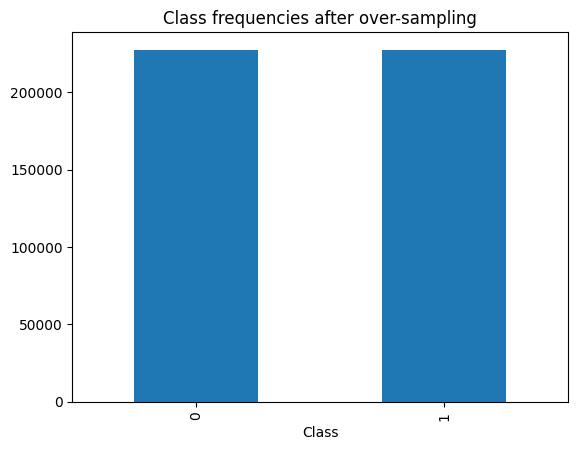

In [15]:
data_train_fraudulent_over = data_train_fraudulent.sample(len(data_train_authentic), replace = 'True')
data_train_over = pd.concat([data_train_authentic, data_train_fraudulent_over], axis = 0)

X_train_over = data_train_over.drop('Class', axis = 1)
y_train_over = data_train_over['Class']

print('Class frequencies after over-sampling:')
print(y_train_over.value_counts())
y_train_over.value_counts().plot(kind = 'bar', title = 'Class frequencies after over-sampling')

In [16]:
# Amount vs Time for authentic and fraudulent transactions in the training set after random over-sampling

class_list = list(y_train_over)
fraud_status = []
for i in range(len(class_list)):
    fraud_status.append(bool(class_list[i]))

fig1 = px.scatter(data_train_over,
                 x = 'Time',
                 y = 'Amount', 
                 facet_col = fraud_status,
                 color = fraud_status,
                 title = 'Amount vs Time',
                 template = 'ggplot2'
                )
fig1.show()

### Feature Scaling
- 데이터 스케일링을 통해 모든 피처들의 샘플 데이터 분포와 범위를 동일하게 조정합니다.
- 참고 : https://dacon.io/codeshare/4526

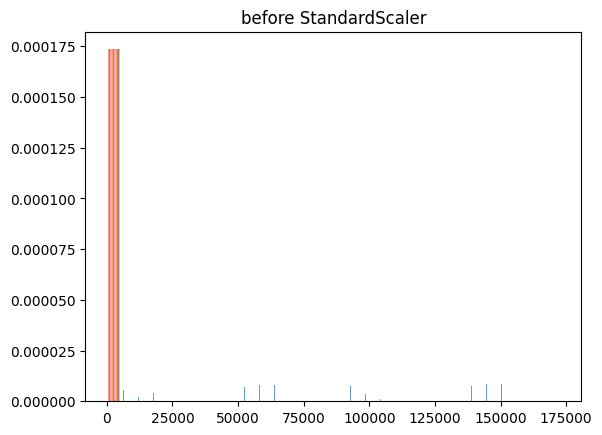

In [17]:
plt.hist(X_train_over, bins=30, alpha = 0.7, density = True)
plt.title('before StandardScaler')

plt.show()

In [18]:
scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train)

X_train_over_scaled_minmax = scaling.transform(X_train_over)
X_test_scaled_minmax = scaling.transform(X_test)

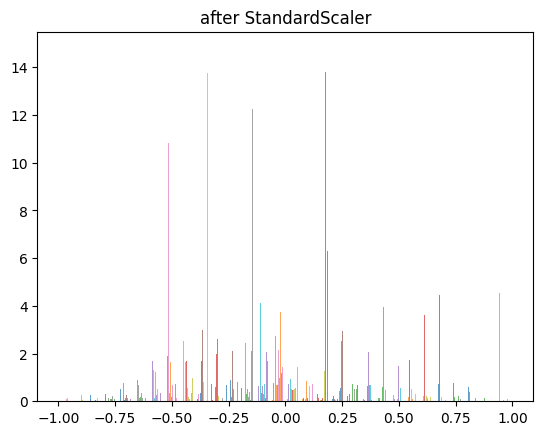

In [19]:
plt.hist(X_train_over_scaled_minmax, bins=30, alpha = 0.7, density = True)
plt.title('after StandardScaler')
plt.show()

### Quiz4. Logistic Regression
4-1. 데이터에 랜덤 오버 샘플링 적용하지 않고 모델을 학습합니다.

4-2. confusion matrix를 출력합니다.

4-3. accuracy, precision, recall, TP, FN, TN, FP 값을 리턴하는 performance_metric 함수를 작성하세요


In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test, pred_test)

print('<Confusion matrix>')
print(confusion)


<Confusion matrix>
[[56823    27]
 [   30    82]]


C:\Users\chan\anaconda3\envs\proj\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(50.722222222222214, 0.5, 'True label')

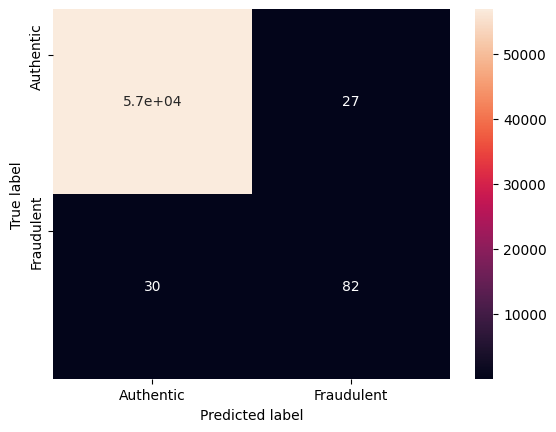

In [21]:
import seaborn as sns
class_names = ['Authentic', 'Fraudulent']
sns.heatmap(confusion, annot = True)
tick_marks_y = [0.25, 1.2]
tick_marks_x = [0.5, 1.5]

plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [22]:
def performance_metric(confusion_matrix):
    
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TP = confusion_matrix[1, 1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN) 

    
    return accuracy, precision, recall, TP, FN, TN, FP

    
    

In [23]:
accuracy, precision, recall, TP, FN, TN, FP = performance_metric(confusion)
print(f'Accuracy:{accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

Accuracy:1.00, Precision: 0.75, Recall: 0.73


In [24]:
fig1 = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "pie"}]])

fig1.add_trace(go.Pie(
    labels = ['TP', 'FN'],
    values = [TP, FN],
    domain = dict(x = [0, 0.4]),
    name = 'Positive Class'), 
    row = 1, col = 1)

fig1.add_trace(go.Pie(
    labels = ['TN', 'FP'],
    values = [TN, FP],
    domain = dict(x = [0.4, 0.8]),
    name = 'Negative Class'),
    row = 1, col = 2)

fig1.update_layout(height = 450, showlegend = True)
fig1.show()


### Quiz5. Logistic Regression
5-1. 데이터에 랜덤 오버 샘플링 적용하고 모델을 학습합니다.

5-2. confusion matrix를 출력합니다.

5-3. accuracy, precision, recall, TP, FN, TN, FP 값을 출력하세요.

In [26]:
from sklearn.linear_model import LogisticRegression 

model_over= LogisticRegression(random_state=42)### 이곳에 5-1 답을 작성하세요 ####
model_over.fit(X_train_over, y_train_over)

pred_train_over = model_over.predict(X_train_over)
pred_test_over = model_over.predict(X_test)

confusion_over = confusion_matrix(y_test, pred_test_over)### 이곳에 5-2 답을 작성하세요 ####

print('<Confusion matrix>')
print(confusion_over)

<Confusion matrix>
[[54105  2745]
 [    8   104]]


Text(50.722222222222214, 0.5, 'True label')

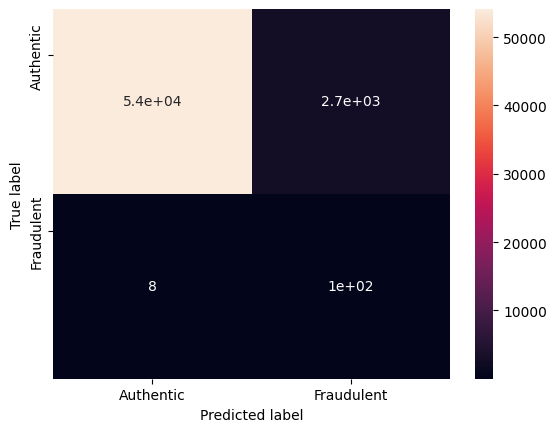

In [27]:
import seaborn as sns
class_names = ['Authentic', 'Fraudulent']
sns.heatmap(confusion_over, annot = True)
tick_marks_y = [0.25, 1.2]
tick_marks_x = [0.5, 1.5]

plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [36]:
### 이곳에 5-3 답을 작성하세요 ####
def performance_metric(confusion_over):
    
    TN_over = confusion_over[0, 0]
    FP_over = confusion_over[0, 1]
    FN_over = confusion_over[1, 0]
    TP_over = confusion_over[1, 1]

    accuracy_over = (TP_over + TN_over) / (TP_over + TN_over + FP_over + FN_over)
    precision_over = TP_over / (TP_over + FP_over)
    recall_over = TP_over / (TP_over + FN_over) 

    
    return accuracy_over, precision_over, recall_over, TP_over, FN_over, TN_over, FP_over

    
accuracy_over, precision_over, recall_over, TP_over, FN_over, TN_over, FP_over = performance_metric(confusion_over)


print(f'Accuracy:{accuracy_over:.2f}, Precision: {precision_over:.2f}, Recall: {recall_over:.2f}')

Accuracy:0.95, Precision: 0.04, Recall: 0.93


In [37]:
fig1 = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "pie"}]])

fig1.add_trace(go.Pie(
    labels = ['TP', 'FN'],
    values = [TP_over, FN_over],
    domain = dict(x = [0, 0.4]),
    name = 'Positive Class'), 
    row = 1, col = 1)

fig1.add_trace(go.Pie(
    labels = ['TN', 'FP'],
    values = [TN_over, FP_over],
    domain = dict(x = [0.4, 0.8]),
    name = 'Negative Class'),
    row = 1, col = 2)

fig1.update_layout(height = 450, showlegend = True)
fig1.show()

### Quiz6. Ridge Classifier
6-1. 데이터에 랜덤 오버 샘플링 적용하지않고  Ridge 모델을 학습합니다.

6-2. confusion matrix를 출력합니다.

6-3. accuracy, precision, recall, TP, FN, TN, FP 값을 출력하세요.

In [32]:

ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train,y_train)### 이곳에 6-1 답을 작성하세요 ####

pred_train_ridge = ridge_model.predict(X_train)
pred_test_ridge = ridge_model.predict(X_test)
pred_test_ridge = (pred_test_ridge > 0.5).astype(int) 
# confusion_ridge = confusion_matrix(y_test, pred_test_ridge)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_ridge = confusion_matrix(y_test, pred_test_ridge)### 이곳에 6-2 답을 작성하세요 ####


print('<Confusion matrix>')
print(confusion_ridge)

<Confusion matrix>
[[56843     7]
 [   64    48]]


Text(50.722222222222214, 0.5, 'True label')

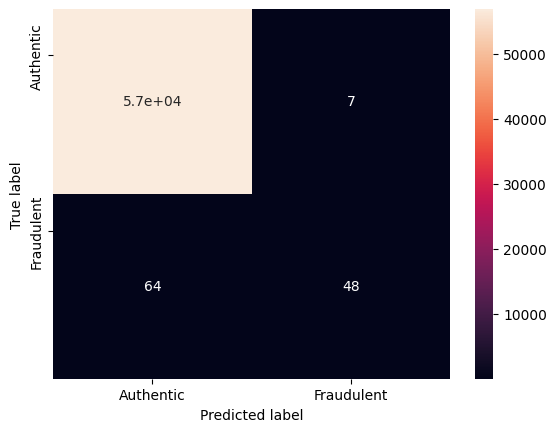

In [34]:
import seaborn as sns
class_names = ['Authentic', 'Fraudulent']
sns.heatmap(confusion_ridge, annot = True)
tick_marks_y = [0.25, 1.2]
tick_marks_x = [0.5, 1.5]

plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [48]:
### 이곳에 6-3 답을 작성하세요 ####
def performance_metric(confusion_ridge):
    
    TN_ridge = confusion_ridge[0, 0]
    FP_ridge = confusion_ridge[0, 1]
    FN_ridge = confusion_ridge[1, 0]
    TP_ridge = confusion_ridge[1, 1]

    accuracy_ridge = (TP_ridge + TN_ridge) / (TP_ridge + TN_ridge + FP_ridge + FN_ridge)
    precision_ridge = TP_ridge / (TP_ridge + FP_ridge)
    recall_ridge = TP_ridge / (TP_ridge + FN_ridge) 

    return accuracy_ridge, precision_ridge, recall_ridge, TP_ridge, FN_ridge, TN_ridge, FP_ridge

    
accuracy_ridge, precision_ridge, recall_ridge, TP_ridge, FN_ridge, TN_ridge, FP_ridge = performance_metric(confusion_ridge)

print(f'Accuracy:{accuracy_ridge:.2f}, Precision: {precision_ridge:.2f}, Recall: {recall_ridge:.2f}')

Accuracy:1.00, Precision: 0.87, Recall: 0.43


In [39]:
fig1 = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "pie"}]])

fig1.add_trace(go.Pie(
    labels = ['TP', 'FN'],
    values = [TP_ridge, FN_ridge],
    domain = dict(x = [0, 0.4]),
    name = 'Positive Class'), 
    row = 1, col = 1)

fig1.add_trace(go.Pie(
    labels = ['TN', 'FP'],
    values = [TN_ridge, FP_ridge],
    domain = dict(x = [0.4, 0.8]),
    name = 'Negative Class'),
    row = 1, col = 2)

fig1.update_layout(height = 450, showlegend = True)
fig1.show()

### Quiz7. 각 모델의 Accuracy, Precision, Recall을 모은 판다스 프레임을 생성하세요

In [47]:
### 이곳에 Quiz7의 답을 작성하세요 ###
import pandas as pd


metrics_data = {
    'Metric': ['Logistic Regression', 'Logistic Regression with Over-sampling', 'Ridge Regression'],
    'Accuracy': [accuracy, accuracy_over, accuracy_ridge],
    'Precision': [precision, precision_over, precision_ridge],
    'Recall': [recall, recall_over, recall_ridge]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Metric', inplace=True)


metrics_df

,Accuracy,Precision,Recall
Metric,,,
Logistic Regression,0.998999,0.752294,0.732143
Logistic Regression with Over-sampling,0.951670,0.036504,0.928571
Ridge Regression,0.998754,0.872727,0.428571


### Quiz8
- 이번 과제에서 한 데이터 처럼 클래스 간 데이터가 불균형 할 경우, 어떤 성능 지표를 가지고 모델의 학습정도를 파악 해야하는지 조사해서 작성하세요.

- answer : Recall(재현율)은 분류 모델의 성능을 평가하기 위한 지표 중 하나로, 실제로 양성인 샘플 중에서 모델이 양성으로 정확히 예측한 샘플의 비율을 나타냅니다. Precision(정밀도)는 분류 모델의 성능을 평가하기 위한 지표 중 하나로, 모델이 양성으로 예측한 샘플 중에서 실제로 양성인 샘플의 비율을 나타냅니다. Precision은 모델이 분류한 양성 예측 중에서 실제로 양성인 비율을 나타내며, Recall은 실제 양성 중에서 모델이 양성으로 예측한 비율입니다. F1 score는 이 두 평가 지표를 모두 고려하여 수식은 2 * (Precision * Recall) / (Precision + Recall)이며 모델의 예측 성능을 평가하기 때문에, 정확한 예측과 재현율의 평균을 동시에 고려할 수 있는 장점이 있습니다.